### Seaborn uses Matplotlib as the underlying library and very good at visualizing the data.
#### Follow here: https://seaborn.pydata.org/tutorial.html#tutorial

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bulutmf/data-science-toolbox/master/data-wrangling/datasets/googleplaystore.csv')

In [4]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Bar plot

In [5]:
# Lets plot the histogram of categories with their frequencies
groups = df.groupby(['Category'])
grp_freq = groups.size()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

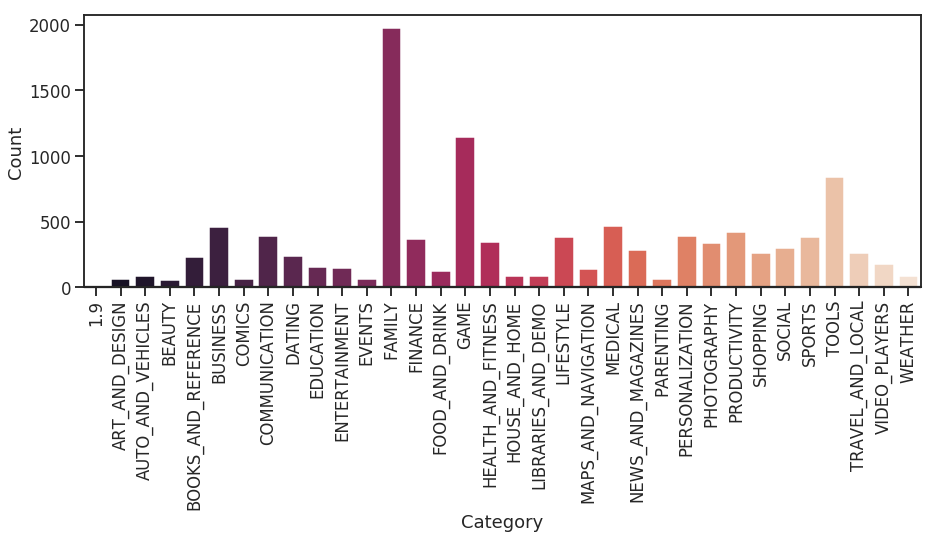

In [60]:
# white, dark, whitegrid, darkgrid, ticks
sns.set(style="ticks", context="talk", palette='muted')

# Data
x = grp_freq.index
y = grp_freq.values


# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

# Plot
sns.barplot(x=x, y=y, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Count")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

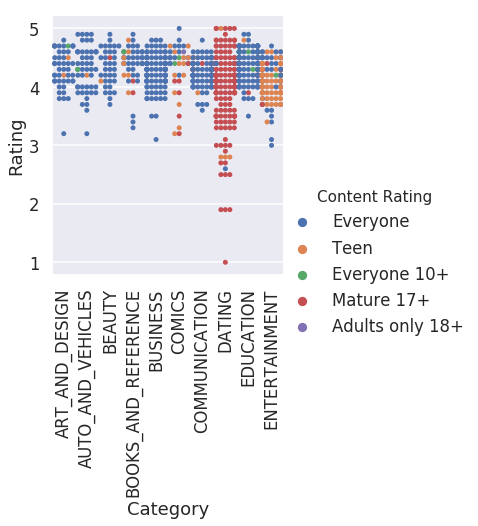

In [7]:
sns.catplot(x="Category", y="Rating", hue="Content Rating", kind="swarm", data=df.iloc[0:1000]);
plt.xticks(rotation=90)

## Scatter

In [24]:
tips = sns.load_dataset("tips")

In [25]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


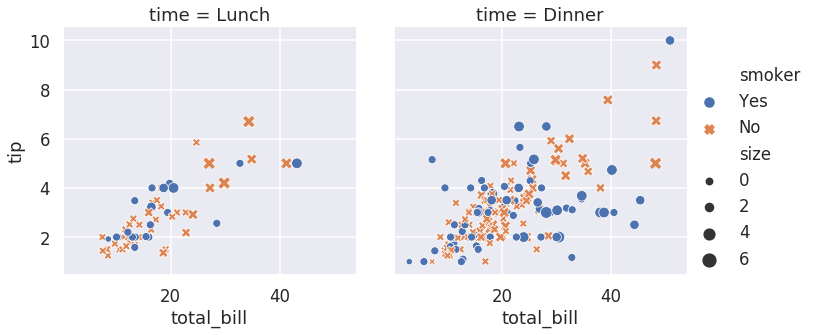

In [26]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

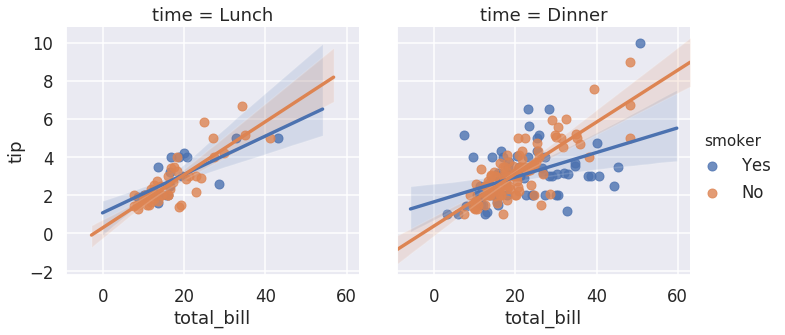

In [27]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", data=tips);

In [28]:
dots = sns.load_dataset("dots")
dots.head(2)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726


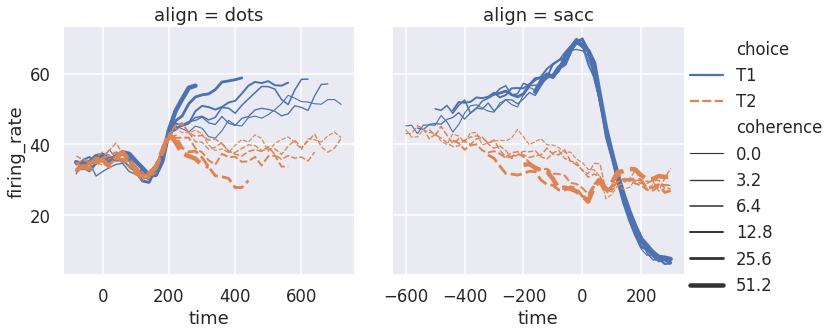

In [29]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

In [30]:
fmri = sns.load_dataset("fmri")
fmri.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883


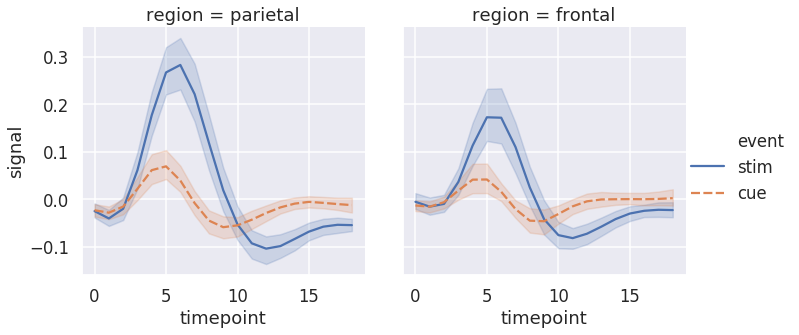

In [31]:
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

## Caterogical Plots

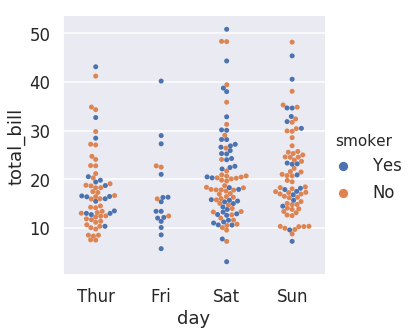

In [32]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips);

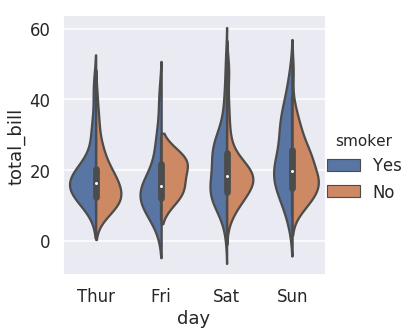

In [33]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", split=True, data=tips);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

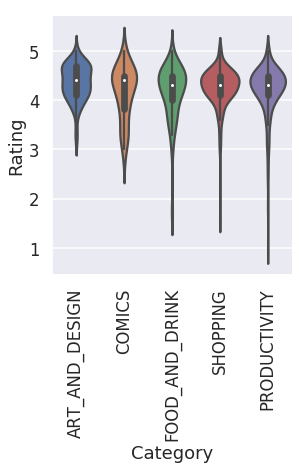

In [57]:
categories = df['Category'].unique()
categories = categories[np.random.randint(0, len(categories), 5)]
sns.catplot(x="Category", y='Rating', kind='violin', data=df.query('Category in @categories'))
plt.xticks(rotation=90)

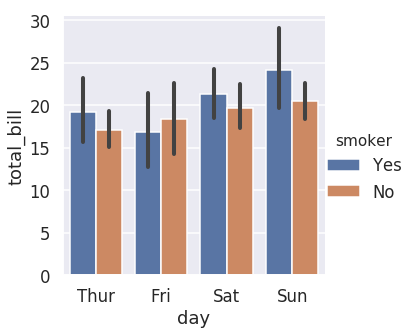

In [58]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="bar", data=tips);